In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from tensorflow.keras.utils import to_categorical

In [22]:
def mel_spect_data(sample_rate = 22050, hop_length = 512):
  labels = []
  mel_spects = []
  for folder in os.scandir('drive/MyDrive/Data/genres_original'):
    for file in os.scandir('drive/MyDrive/Data/genres_original/'+str(folder)[11:-2]):
      signal, sample_r = librosa.load(file, sample_rate)

      label = str(file)[11:-12]
      #labels.append(label)

      spect = librosa.feature.melspectrogram(y=signal, sr=sample_r, hop_length=hop_length)
      spect = librosa.power_to_db(spect, ref=np.max)

      #if spect.shape[1] != 1320:
      #      spect.resize(128,1320, refcheck=False)

      if spect.shape == (128,1293):
        mel_spects.append(spect)
        labels.append(label)
      
      #mel_spects.append(spect)
      #print(spect.shape)

  labels = pd.Series(labels)
  label_dict = {'blues': 0,'classical': 1,'country': 2,'disco': 3,'hiphop': 4,'jazz': 5,'metal': 6,'pop': 7,'reggae': 8,'rock': 9}
  mel_spect_label = labels.map(label_dict).values
  mel_spect_data = np.array(mel_spects)
  return mel_spect_data, mel_spect_label

In [23]:
X, y = mel_spect_data()

In [24]:
X.shape

(944, 128, 1293)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape

(755, 128, 1293)

In [30]:
X_train.min()

-80.0

In [31]:
# Scaling our data to be between 0 and 1 using the minimum value from above
X_train /= -80
X_test /= -80

In [32]:
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [33]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
24/24 [==============================] - 13s 493ms/step - loss: 5.3623 - accuracy: 0.0967 - val_loss: 2.8397 - val_accuracy: 0.1005
Epoch 2/50
24/24 [==============================] - 12s 482ms/step - loss: 2.6603 - accuracy: 0.1682 - val_loss: 2.8366 - val_accuracy: 0.2116
Epoch 3/50
24/24 [==============================] - 13s 544ms/step - loss: 2.2965 - accuracy: 0.2053 - val_loss: 2.1366 - val_accuracy: 0.2222
Epoch 4/50
24/24 [==============================] - 12s 482ms/step - loss: 2.0885 - accuracy: 0.3020 - val_loss: 2.1586 - val_accuracy: 0.1587
Epoch 5/50
24/24 [==============================] - 12s 480ms/step - loss: 1.9564 - accuracy: 0.3152 - val_loss: 2.2363 - val_accuracy: 0.2804
Epoch 6/50
24/24 [==============================] - 12s 481ms/step - loss: 1.9105 - accuracy: 0.3616 - val_loss: 2.3306 - val_accuracy: 0.2434
Epoch 7/50
24/24 [==============================] - 11s 477ms/step - loss: 1.8359 - accuracy: 0.3497 - val_loss: 2.1236 - val_accuracy: 0.2910

In [35]:
def plot_history(history):

  plt.figure(figsize=(6,3))
  #create accuracy sublpot
  plt.plot(history.history["accuracy"], label="train accuracy")
  plt.plot(history.history["val_accuracy"], label="test accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  #axs[0].legend(loc="lower right")
  plt.title('Accuracy Comparison')
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(6,3))
  #create error sublpot
  plt.plot(history.history["loss"], label="train error")
  plt.plot(history.history["val_loss"], label="test error")
  plt.ylabel('Error')
  plt.xlabel('Epoch')
  #axs[1]wlegend(loc="upper right")
  plt.title('Error Comparison')
  plt.legend()
  plt.tight_layout()
  plt.show()

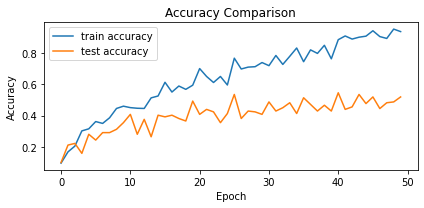

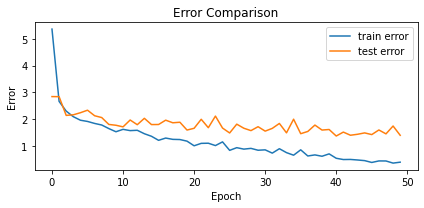

In [36]:
plot_history(history)

In [37]:
#not bad, but there is overfitting. 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [51]:
print(X_train.shape)

(755, 128, 1293)


In [52]:
print(X_test.shape)

(189, 128, 1293)


In [62]:
X_train /= -80
X_test /= -80

In [63]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [64]:
print(X_train.shape)

(755, 128, 1293, 1)


In [65]:
print(X_test.shape)

(189, 128, 1293, 1)


In [66]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [68]:
#FFNN
model = Sequential()

# Adding a flattened layer to input our image data
model.add(keras.layers.Flatten(input_shape = (128, 1293, 1)))

# Adding a dense layer with 128 neurons
model.add(keras.layers.Dense(128, activation='relu'))

# Adding a dense layer with 128 neurons
model.add(keras.layers.Dense(128, activation='relu'))

# Adding a dense layer with 64 neurons
model.add(keras.layers.Dense(64, activation='relu'))

# Adding an output layer
model.add(keras.layers.Dense(10, activation='softmax'))


In [69]:
# Compiling our neural network
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [70]:
# Fitting our neural network
history = model.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
48/48 [==============================] - 6s 111ms/step - loss: 25.6317 - accuracy: 0.0993 - val_loss: 3.9848 - val_accuracy: 0.1164
Epoch 2/40
48/48 [==============================] - 5s 103ms/step - loss: 3.3551 - accuracy: 0.1735 - val_loss: 4.5569 - val_accuracy: 0.0899
Epoch 3/40
48/48 [==============================] - 5s 102ms/step - loss: 2.6108 - accuracy: 0.2450 - val_loss: 2.6504 - val_accuracy: 0.1640
Epoch 4/40
48/48 [==============================] - 5s 103ms/step - loss: 2.3870 - accuracy: 0.2636 - val_loss: 2.4122 - val_accuracy: 0.2751
Epoch 5/40
48/48 [==============================] - 5s 106ms/step - loss: 2.7178 - accuracy: 0.2662 - val_loss: 2.5358 - val_accuracy: 0.2910
Epoch 6/40
48/48 [==============================] - 5s 104ms/step - loss: 2.5780 - accuracy: 0.2331 - val_loss: 2.7648 - val_accuracy: 0.1958
Epoch 7/40
48/48 [==============================] - 5s 102ms/step - loss: 2.4272 - accuracy: 0.2397 - val_loss: 4.1940 - val_accuracy: 0.1376
Epoch

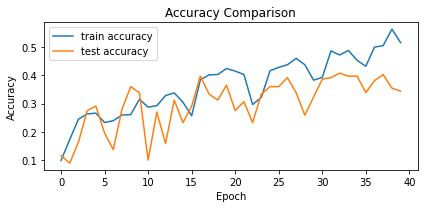

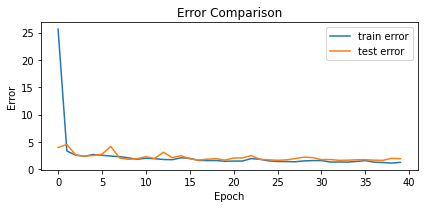

In [71]:
plot_history(history)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [80]:
X_train /= -80
X_test /= -80

In [81]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [82]:
X_train.shape

(755, 128, 1293, 1)

In [83]:
X_test.shape

(189, 128, 1293, 1)

In [84]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [86]:
# Initiating an empty neural network
cnn_model = Sequential()

# Adding convolutional layer
cnn_model.add(keras.layers.Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(128,1293,1)))

# Adding max pooling layer
cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2,4)))

# Adding convolutional layer
cnn_model.add(keras.layers.Conv2D(filters=32,
                     kernel_size=(3,3),
                     activation='relu'))

# Adding max pooling layer
cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2,4)))

# Adding a flattened layer to input our image data
cnn_model.add(keras.layers.Flatten())

# Adding a dense layer with 64 neurons
cnn_model.add(keras.layers.Dense(64, activation='relu'))

# Adding a dropout layer for regularization
cnn_model.add(keras.layers.Dropout(0.25))

# Adding an output layer
cnn_model.add(keras.layers.Dense(10, activation='softmax'))


In [87]:
# Compiling our neural network
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [88]:
history = cnn_model.fit(X_train,
                        y_train, 
                        batch_size=16,
                        validation_data=(X_test, y_test),
                        epochs=15)

Epoch 1/15
48/48 [==============================] - 57s 1s/step - loss: 2.3949 - accuracy: 0.1166 - val_loss: 2.2522 - val_accuracy: 0.0899
Epoch 2/15
48/48 [==============================] - 55s 1s/step - loss: 2.1477 - accuracy: 0.1907 - val_loss: 2.0634 - val_accuracy: 0.3386
Epoch 3/15
48/48 [==============================] - 55s 1s/step - loss: 1.8707 - accuracy: 0.3192 - val_loss: 1.7400 - val_accuracy: 0.3915
Epoch 4/15
48/48 [==============================] - 55s 1s/step - loss: 1.5618 - accuracy: 0.4715 - val_loss: 1.6991 - val_accuracy: 0.4656
Epoch 5/15
48/48 [==============================] - 55s 1s/step - loss: 1.2867 - accuracy: 0.5311 - val_loss: 1.3059 - val_accuracy: 0.6085
Epoch 6/15
48/48 [==============================] - 57s 1s/step - loss: 0.9627 - accuracy: 0.6702 - val_loss: 1.2582 - val_accuracy: 0.5767
Epoch 7/15
48/48 [==============================] - 56s 1s/step - loss: 0.7895 - accuracy: 0.7417 - val_loss: 1.2882 - val_accuracy: 0.5979
Epoch 8/15
48/48 [==

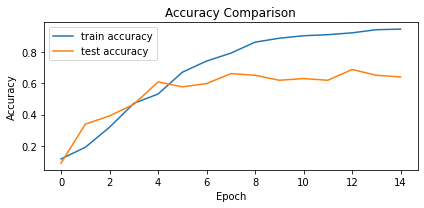

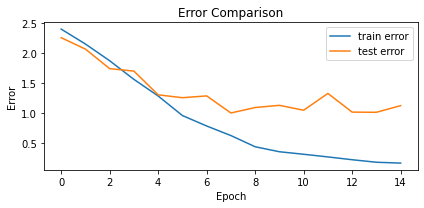

In [89]:
plot_history(history)

In [24]:
#a bit overfit but this works well!!

In [105]:
labels_dict = {
    0: 'blues',
    1: 'classical',
    2: 'country',
    3: 'disco',
    4: 'hiphop',
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

In [93]:
predictions = cnn_model.predict(X_test, verbose=1)

6/6 [==============================] - 5s 666ms/step


In [102]:
cf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
cf_matrix

array([[12,  0,  2,  4,  0,  1,  1,  0,  0,  0],
       [ 0, 18,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  7,  1,  0,  0,  0,  3,  0,  2],
       [ 1,  0,  1, 13,  1,  0,  0,  1,  0,  1],
       [ 1,  0,  0,  1, 13,  0,  1,  0,  0,  0],
       [ 5,  4,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 1,  0,  0,  4,  0,  0,  0, 15,  0,  0],
       [ 3,  0,  0,  2,  3,  0,  0,  1, 11,  0],
       [ 6,  0,  3,  3,  0,  2,  0,  3,  0,  2]])

In [103]:
confusion_df = pd.DataFrame(cf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,12,0,2,4,0,1,1,0,0,0
1,0,18,1,0,0,0,0,0,0,0
2,4,1,7,1,0,0,0,3,0,2
3,1,0,1,13,1,0,0,1,0,1
4,1,0,0,1,13,0,1,0,0,0
5,5,4,0,0,0,10,0,0,0,0
6,0,0,0,0,0,0,20,0,0,0
7,1,0,0,4,0,0,0,15,0,0
8,3,0,0,2,3,0,0,1,11,0
9,6,0,3,3,0,2,0,3,0,2


In [106]:
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,12,0,2,4,0,1,1,0,0,0
classical,0,18,1,0,0,0,0,0,0,0
country,4,1,7,1,0,0,0,3,0,2
disco,1,0,1,13,1,0,0,1,0,1
hiphop,1,0,0,1,13,0,1,0,0,0
jazz,5,4,0,0,0,10,0,0,0,0
metal,0,0,0,0,0,0,20,0,0,0
pop,1,0,0,4,0,0,0,15,0,0
reggae,3,0,0,2,3,0,0,1,11,0
rock,6,0,3,3,0,2,0,3,0,2


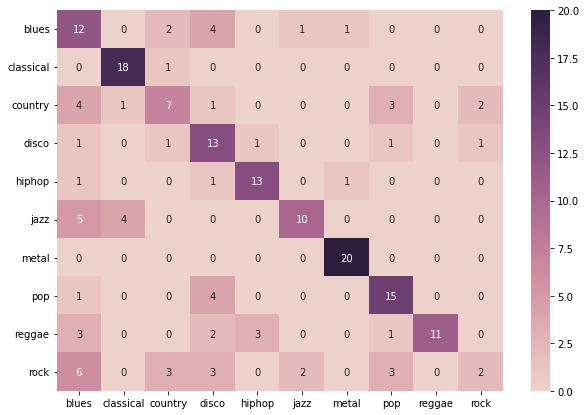

In [112]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_df, annot=True, cmap=sn.cubehelix_palette(200), fmt='g')
#actual values are on the y axis and predicted values are on the x axis